# AIRLINE TICKET PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dfa=pd.read_csv('https://raw.githubusercontent.com/anandaiml19/ML_ZoomCamp_2023/main/Cleaned_dataset.csv')

In [ ]:
dfa.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


**Data Cleaning and Preprocessing**

In [ ]:
dfa['Date_of_journey']=dfa['Date_of_journey'].astype('datetime64[ns]')

In [ ]:
dfa['day_of_month']=dfa['Date_of_journey'].dt.strftime('%d')

In [ ]:
dfa.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,day_of_month
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,16
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,16
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,16
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,16
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,16


In [ ]:
dfa[['day_of_month']]=dfa[['day_of_month']].astype('int')

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    452088 non-null  datetime64[ns]
 1   Journey_day        452088 non-null  object        
 2   Airline            452088 non-null  object        
 3   Flight_code        452088 non-null  object        
 4   Class              452088 non-null  object        
 5   Source             452088 non-null  object        
 6   Departure          452088 non-null  object        
 7   Total_stops        452088 non-null  object        
 8   Arrival            452088 non-null  object        
 9   Destination        452088 non-null  object        
 10  Duration_in_hours  452088 non-null  float64       
 11  Days_left          452088 non-null  int64         
 12  Fare               452088 non-null  int64         
 13  day_of_month       452088 non-null  int64   

In [ ]:
dfa.dtypes

Date_of_journey      datetime64[ns]
Journey_day                  object
Airline                      object
Flight_code                  object
Class                        object
Source                       object
Departure                    object
Total_stops                  object
Arrival                      object
Destination                  object
Duration_in_hours           float64
Days_left                     int64
Fare                          int64
day_of_month                  int64
dtype: object

In [ ]:
datecols= list(dfa.dtypes[dfa.dtypes=='datetime64[ns]'].index)

In [ ]:
datecols

['Date_of_journey']

In [ ]:
dfa.columns=dfa.columns.str.lower()

In [ ]:
dfa.columns

Index(['date_of_journey', 'journey_day', 'airline', 'flight_code', 'class',
       'source', 'departure', 'total_stops', 'arrival', 'destination',
       'duration_in_hours', 'days_left', 'fare', 'day_of_month'],
      dtype='object')

In [ ]:
categoricalsn= list(dfa.dtypes[dfa.dtypes=='object'].index)

In [ ]:
categoricalsn

['journey_day',
 'airline',
 'flight_code',
 'class',
 'source',
 'departure',
 'total_stops',
 'arrival',
 'destination']

In [ ]:
newcols=['journey_day','airline','class','source','departure','total_stops','arrival','destination','day_of_month', 'days_left', 'duration_in_hours', 'fare']

In [ ]:
len(newcols)

12

In [ ]:
dfa.corr()

<ipython-input-21-57989363fcdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfa.corr()


,duration_in_hours,days_left,fare,day_of_month
duration_in_hours,1.000000,-0.032878,0.179909,0.018263
days_left,-0.032878,1.000000,-0.087852,-0.263019
fare,0.179909,-0.087852,1.000000,0.031022
day_of_month,0.018263,-0.263019,0.031022,1.000000


In [ ]:
del dfa['flight_code']

In [ ]:
dfa.head()

,date_of_journey,journey_day,airline,class,source,departure,total_stops,arrival,destination,duration_in_hours,days_left,fare,day_of_month
0,2023-01-16,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,16
1,2023-01-16,Monday,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,16
2,2023-01-16,Monday,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,16
3,2023-01-16,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,16
4,2023-01-16,Monday,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,16


**Exploratory Data Analysis**

In [ ]:
dfa.describe()

,duration_in_hours,days_left,fare,day_of_month
count,452088.000000,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890,16.040337
std,7.431478,14.300846,20307.963002,9.085187
min,0.750000,1.000000,1307.000000,1.000000
25%,6.583300,13.000000,8762.750000,7.000000
50%,11.333300,26.000000,13407.000000,17.000000
75%,16.500000,38.000000,35587.000000,24.000000
max,43.583300,50.000000,143019.000000,31.000000


In [ ]:
dfa.isnull().sum()

date_of_journey      0
journey_day          0
airline              0
class                0
source               0
departure            0
total_stops          0
arrival              0
destination          0
duration_in_hours    0
days_left            0
fare                 0
day_of_month         0
dtype: int64

**What is the average variation of Fare (Target variable) with days of the month on average?**

In [ ]:
days_monthh=dfa.groupby('day_of_month')['fare'].mean()

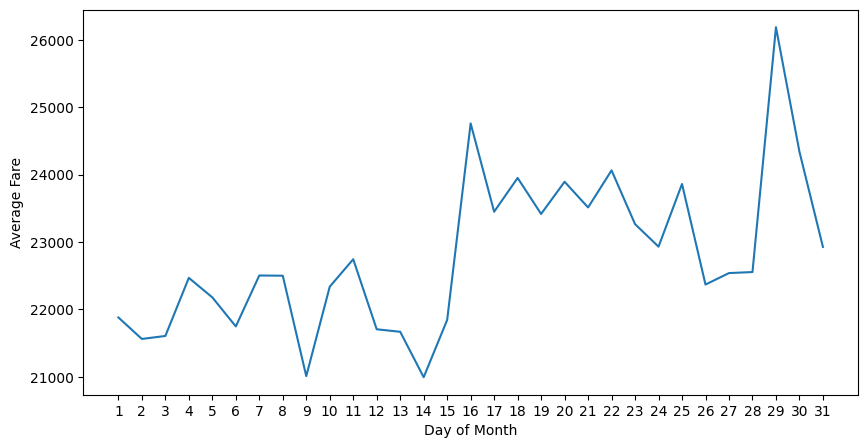

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(days_monthh.index,days_monthh.values)
plt.xticks(days_monthh.index)
plt.xlabel("Day of Month")
plt.ylabel("Average Fare")
plt.show()

It is observed from the above plot that the average price varies significantly theough out the days of the month, with lower average fare observed in mid days of the month (9th and 14th day) and higher price observed in the final days of the month(29th day) of the month.

**How the Fare (Target variable) varies with different airlines and class?**

In [ ]:
differnt_airlines=dfa.groupby(['airline','class'],as_index=False)['fare'].mean()

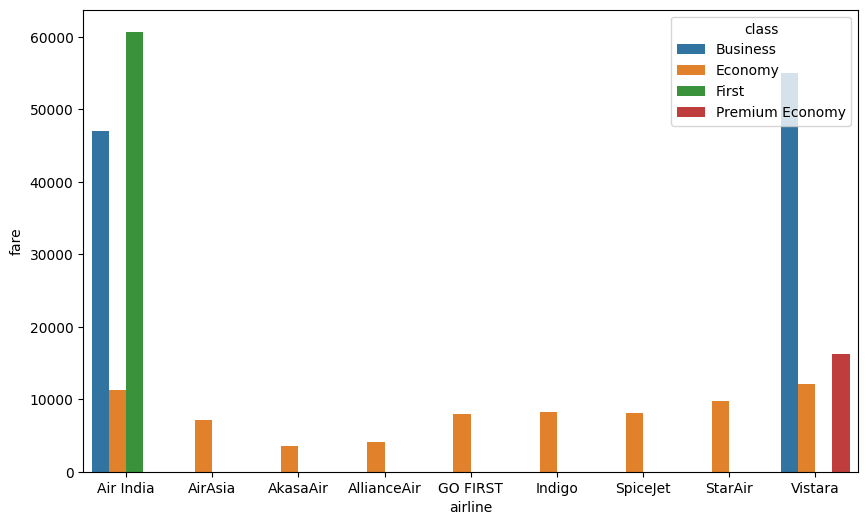

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='airline',y='fare',hue='class',data=differnt_airlines,ax=ax)
plt.show()

It is observed from the plot that economy is the most available class in all airlines. The Airasia airline only offers the firstclass with most high fare. The premium economy is only offered by Vistara airlines.

**How the Fare (Target variable) varies with respect to different months?**

In [ ]:
dif_months= dfa['date_of_journey'].dt.strftime("%B")

In [ ]:
dif_months

0         January
1         January
2         January
3         January
4         January
           ...   
452083      March
452084      March
452085      March
452086      March
452087      March
Name: date_of_journey, Length: 452088, dtype: object

In [ ]:
dif_months.values

array(['January', 'January', 'January', ..., 'March', 'March', 'March'],
      dtype=object)

In [ ]:
mont_fare = pd.merge(dfa['fare'],pd.DataFrame(dif_months.values),left_index=True,right_index=True)

In [ ]:
mont_fare.columns

Index(['fare', 0], dtype='object')

In [ ]:
mont_fare=mont_fare.rename(columns={0:'months'})

In [ ]:
mont_fare

,fare,months
0,5335,January
1,5899,January
2,5801,January
3,5794,January
4,5955,January
...,...,...
452083,65028,March
452084,69254,March
452085,69254,March
452086,72980,March


In [ ]:
fare_monthh=mont_fare.groupby('months',as_index=False)['fare'].mean()

In [ ]:
fare_monthh

,months,fare
0,February,21814.985300
1,January,25394.325337
2,March,20960.769035


In [ ]:
fare_monthh['months']=pd.Categorical(fare_monthh['months'],['January','February','March'])

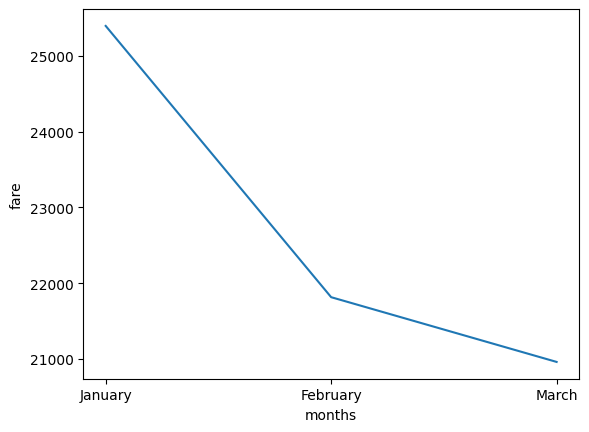

In [ ]:
sns.lineplot(x='months',y='fare',data=fare_monthh)
plt.show()

**Is their any relationship between number of stops and the total fare. How it varies with different airlines.?**

In [ ]:
stops_fare=dfa.groupby(['airline','total_stops'],as_index=False)['fare'].mean()

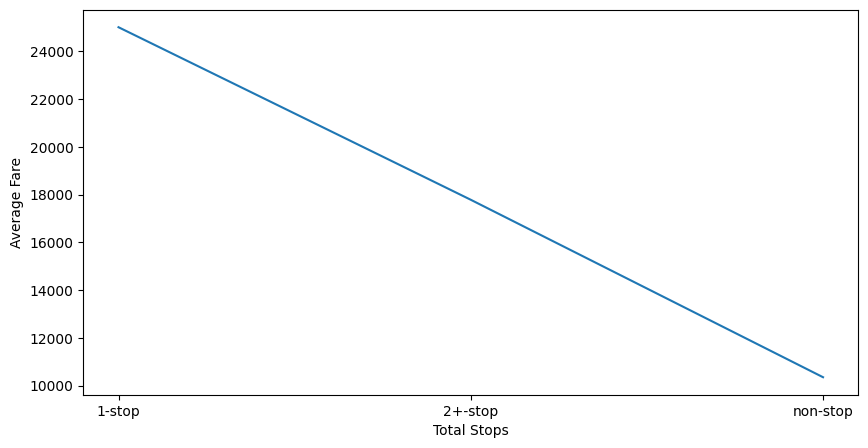

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(stops_fare.total_stops,stops_fare.fare)
plt.xlabel("Total Stops")
plt.ylabel("Average Fare")
plt.show()

In [ ]:
stops_fare_al=dfa.groupby(['airline','total_stops'],as_index=False)['fare'].mean()

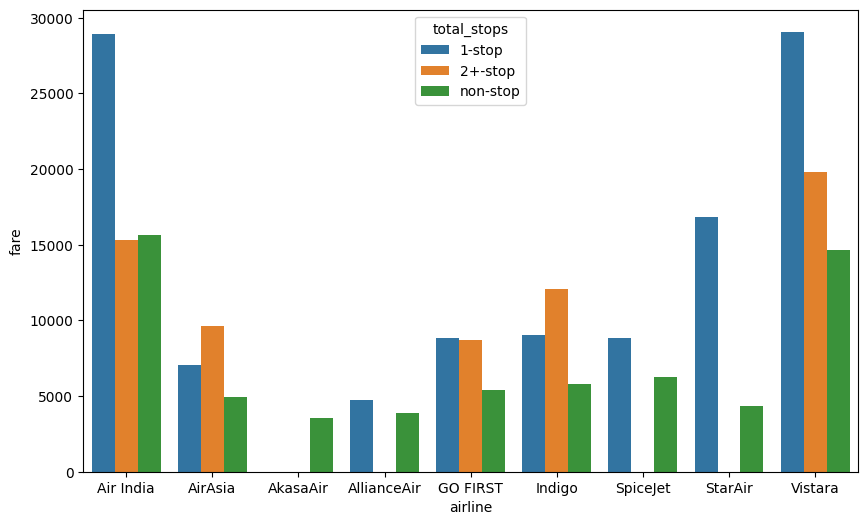

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='airline',y='fare',hue='total_stops',data=stops_fare_al,ax=ax)
plt.show()

It is infered from the above plots that all airlines are offering the non stops services and one stop services are more costlier than 2 stop and non stop services. Also Akasa airlines is only offering the non stop flights.

**How the arrival and departure time varies with the total fare.**

In [ ]:
departure_fare=dfa.groupby(['airline','departure'],as_index=False)['fare'].mean()

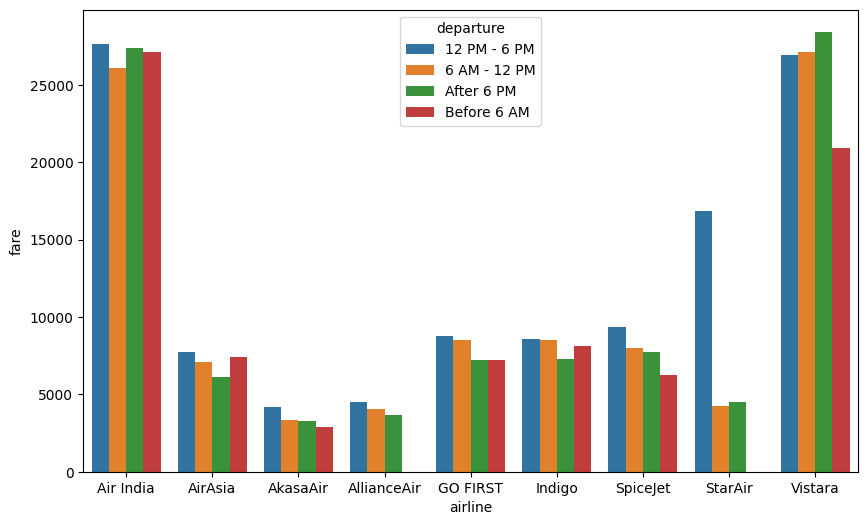

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='airline',y='fare',hue='departure',data=departure_fare,ax=ax)
plt.show()

In [ ]:
arrival_fare=dfa.groupby(['airline','arrival'],as_index=False)['fare'].mean()

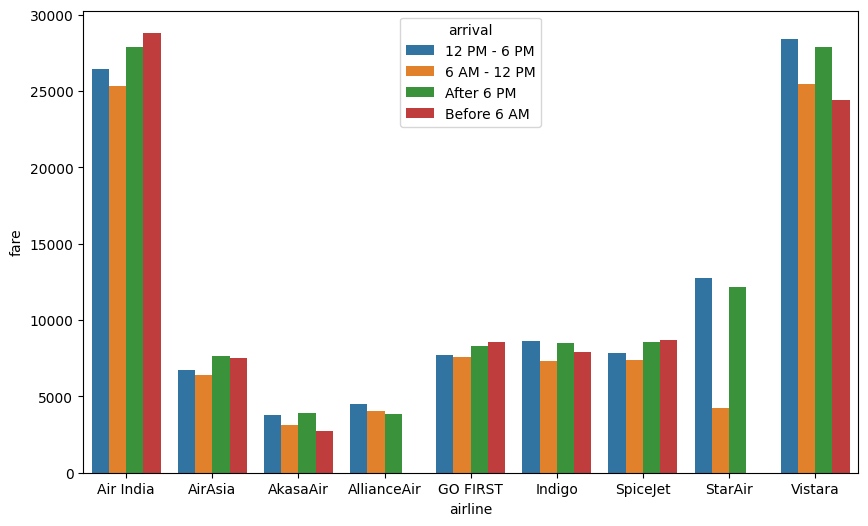

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='airline',y='fare',hue='arrival',data=arrival_fare,ax=ax)
plt.show()

The total fare varies significantly from airlines to airlines for different arrival and departure times.The 12 PM to 6 PM flight have higher costs in most of the airlines during the departure.

**How the duration of flight influence the fare price of different airlines?**

In [ ]:
duration_fare_al=dfa.groupby(['airline','duration_in_hours'],as_index=False)['fare'].mean()

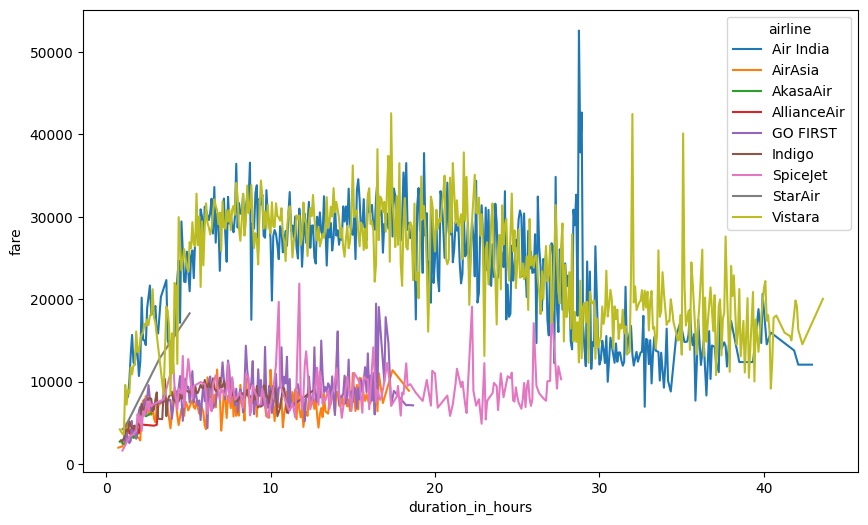

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(x='duration_in_hours',y='fare',hue='airline',data=duration_fare_al,ax=ax)
plt.show()

The Air india and vistara airlines shows almost similar trends in fare with the duration of flights. The star air does not have high duration flights.  

**How the days left for departure affects the fare of different airlines?**

In [ ]:
daysleft_fare_al=dfa.groupby(['airline','days_left'],as_index=False)['fare'].mean()

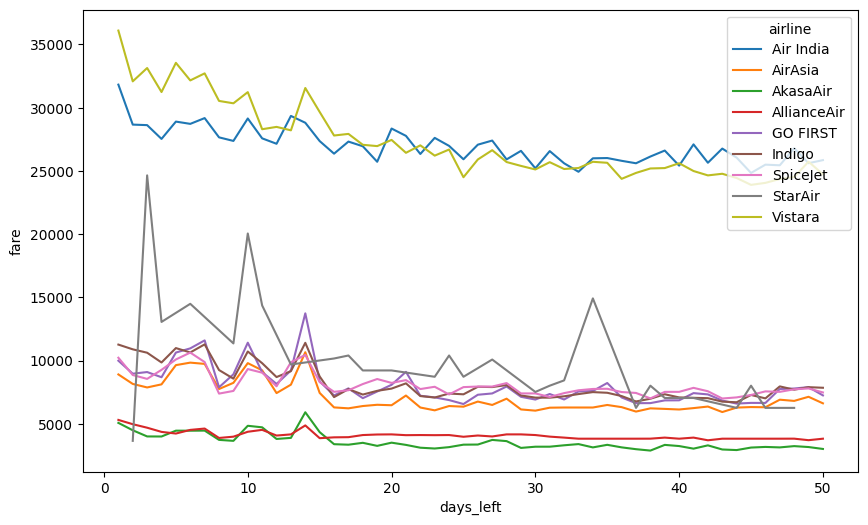

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(x='days_left',y='fare',hue='airline',data=daysleft_fare_al,ax=ax)
plt.legend(loc='upper right',title='airline')
plt.show()

It is infered from the above plot that as days left for departure increases the fare price decreses in all airlines.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

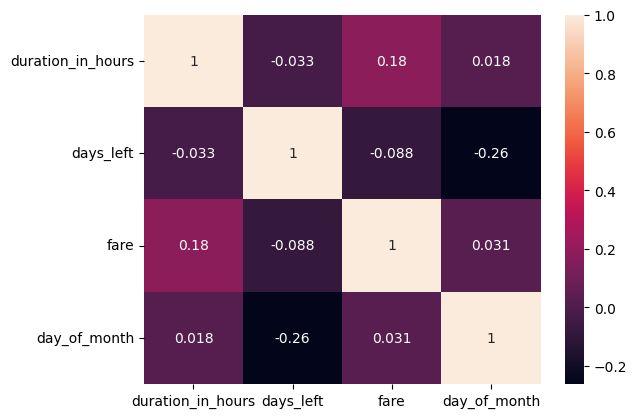

In [ ]:
sns.heatmap(dfa.corr(),annot=True)
plt.show()

**Model Training and Prediction**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import xgboost
xgboost.__version__

'2.0.1'

In [ ]:
dfa_full_train,dfa_test=train_test_split(dfa,test_size=0.2,random_state=42)

In [ ]:
len(dfa_full_train),len(dfa_test)

(361670, 90418)

In [ ]:
dfa_train,dfa_val=train_test_split(dfa_full_train,test_size=0.25,random_state=42)

In [ ]:
len(dfa_train),len(dfa_val),len(dfa_test)

(271252, 90418, 90418)

In [ ]:
dfa_train=dfa_train.reset_index(drop=True)
dfa_val=dfa_val.reset_index(drop=True)
dfa_test=dfa_test.reset_index(drop=True)

In [ ]:
y_train=dfa_train.fare.values
y_val=dfa_val.fare.values
y_test=dfa_test.fare.values

In [ ]:
del dfa_train["fare"]
del dfa_val["fare"]
del dfa_test["fare"]

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
category_new=['journey_day','airline','class','source','departure','total_stops','arrival','destination']

In [ ]:
def mutual_info_car_score(series):
    return mutual_info_score(series,dfa_full_train.fare)

In [ ]:
cs=dfa_full_train[category_new].apply(mutual_info_car_score)
round(cs.sort_values(ascending=False),2)

source         1.72
destination    1.58
airline        0.98
class          0.94
total_stops    0.47
arrival        0.31
departure      0.31
journey_day    0.25
dtype: float64

In [ ]:
dfa.dtypes

date_of_journey      datetime64[ns]
journey_day                  object
airline                      object
class                        object
source                       object
departure                    object
total_stops                  object
arrival                      object
destination                  object
duration_in_hours           float64
days_left                     int64
fare                          int64
day_of_month                  int64
dtype: object

**One hot Encoding**

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
numericc= ['day_of_month', 'days_left', 'duration_in_hours']

In [ ]:
dv=DictVectorizer(sparse=False)
train_dict=dfa_train[category_new+numericc].to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=dfa_val[category_new+numericc].to_dict(orient='records')
x_val=dv.transform(val_dict)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predd=linreg.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("mean squared error",mean_squared_error(y_val,y_predd))

mean squared error 59765557.222786635


In [ ]:
print("R2 score is",r2_score(y_val,y_predd))

R2 score is 0.8546383097380346


In [ ]:
print("Root mean squared error",np.sqrt(mean_squared_error(y_val,y_predd)))

Root mean squared error 7730.8186644615225


In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
ridgereg=Ridge()

In [ ]:
ridgereg.fit(x_train,y_train)

Ridge()

In [ ]:
y_predrr=ridgereg.predict(x_val)

In [ ]:
print("R2 score is",r2_score(y_val,y_predrr))

R2 score is 0.8546386274167405


In [ ]:
import warnings
warnings.filterwarnings('ignore')

 **Hyperparamter** **Tuning - Regression Model**

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
params_rr={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}

In [ ]:
hypertune_ridreg=GridSearchCV(ridgereg,params_rr,cv=10)

In [ ]:
hypertune_ridreg.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45]})

In [ ]:
tlinreg=hypertune_ridreg.best_estimator_

In [ ]:
tlinreg

Ridge(alpha=0.01)

In [ ]:
tlinreg.fit(x_train,y_train)

Ridge(alpha=0.01)

In [ ]:
y_predhptlr=tlinreg.predict(x_val)

In [ ]:
print("R2 score is",r2_score(y_val,y_predhptlr))

R2 score is 0.854638290772779


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

**Decision Tree Regressor**

In [ ]:
dectree=DecisionTreeRegressor()

In [ ]:
dectree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_preddt=dectree.predict(x_val)

In [ ]:
print("R2 score is",r2_score(y_val,y_preddt))

R2 score is 0.9143285378864243


In [ ]:
print("Root mean squared error",np.sqrt(mean_squared_error(y_val,y_preddt)))

Root mean squared error 5934.970898502867


In [ ]:
import numpy as np
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
np.arange(3,26).tolist()[0::2]

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

**Hyperparamter Tuning - Tree Based Regressor**

In [ ]:
params_dtr = {'max_depth': [6,7,8,9,10,11,12,13,14],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [3,4,5,6,7,8]
         }

In [ ]:
hypertune_dtr=GridSearchCV(dectree,params_dtr,cv=5)

In [ ]:
hypertune_dtr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8]})

In [ ]:
tdtreg=hypertune_dtr.best_estimator_

In [ ]:
tdtreg

DecisionTreeRegressor(max_depth=14, max_features='auto', min_samples_leaf=6)

In [ ]:
y_pred_tdt=tdtreg.predict(x_val)

In [ ]:
print("R2 score is",r2_score(y_val,y_pred_tdt))

R2 score is 0.9224101809118923


**Random Forest Regressor**

In [ ]:
randfor=RandomForestRegressor()

In [ ]:
randfor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_predrf=randfor.predict(x_val)

In [ ]:
print("R2 score is",r2_score(y_val,y_predrf))

R2 score is 0.9523855661467852


In [ ]:
print("Root mean squared error",np.sqrt(mean_squared_error(y_val,y_predrf)))

Root mean squared error 4424.557228517298


**XG Boost regressor**

In [ ]:
import xgboost as xgb

In [ ]:
xgb.__version__

'2.0.1'

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbmodel =  XGBRegressor()

In [ ]:
xgbmodel.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predxgb=xgbmodel.predict(x_val)

In [ ]:
print("R2 score is",r2_score(y_val,y_predxgb))

R2 score is 0.9352430087526952


In [ ]:
print("Root mean squared error",np.sqrt(mean_squared_error(y_val,y_predxgb)))

Root mean squared error 5159.930302844038


**Hyperparamter Tuning - XG Boost Regressor**

In [ ]:
xgbmodel_hpt =  XGBRegressor(learning_rate=0.17,max_depth=15,min_child_weight=7)

In [ ]:
xgbmodel_hpt.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.17, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predxgbhpt=xgbmodel_hpt.predict(x_val)

In [ ]:
print("R2 score is",r2_score(y_val,y_predxgbhpt))

R2 score is 0.9591904202013563


In [ ]:
print("Root mean squared error",np.sqrt(mean_squared_error(y_val,y_predxgbhpt)))

Root mean squared error 4096.203891833892


**Best Model**

Based on the Analysis of different models viz., linear and tree based model with Hyperparamter tuning. The XG Boost regressor model delivered higher R2 score with lower Root mean squared error. The final model chosen for this project is **XGB Regressor**.

**Feature Importance Analysis**

In [ ]:
df_important=pd.DataFrame()

In [ ]:
df_important['features']=dv.feature_names_

In [ ]:
df_important['features']

0          airline=Air India
1            airline=AirAsia
2           airline=AkasaAir
3        airline=AllianceAir
4           airline=GO FIRST
5             airline=Indigo
6           airline=SpiceJet
7            airline=StarAir
8            airline=Vistara
9       arrival=12 PM - 6 PM
10      arrival=6 AM - 12 PM
11        arrival=After 6 PM
12       arrival=Before 6 AM
13            class=Business
14             class=Economy
15               class=First
16     class=Premium Economy
17              day_of_month
18                 days_left
19    departure=12 PM - 6 PM
20    departure=6 AM - 12 PM
21      departure=After 6 PM
22     departure=Before 6 AM
23     destination=Ahmedabad
24     destination=Bangalore
25       destination=Chennai
26         destination=Delhi
27     destination=Hyderabad
28       destination=Kolkata
29        destination=Mumbai
30         duration_in_hours
31        journey_day=Friday
32        journey_day=Monday
33      journey_day=Saturday
34        jour

In [ ]:
df_important['importance']=xgbmodel_hpt.feature_importances_


In [ ]:
df_important.sort_values(by="importance",ascending=False).head()

,features,importance
13,class=Business,0.863723
14,class=Economy,0.013521
0,airline=Air India,0.011333
43,source=Kolkata,0.006733
45,total_stops=1-stop,0.005759


**Predicted Vs Actual data - Performance Comparison**

In [ ]:
pred_actu=pd.DataFrame({'Price Actual':y_val,'Price Predicted':y_predxgbhpt})

In [ ]:
pred_actu

,Price Actual,Price Predicted
0,50409,45740.335938
1,49613,52827.429688
2,39321,39538.886719
3,7557,7899.014648
4,16496,17947.822266
...,...,...
90413,7941,6505.875000
90414,46230,48295.632812
90415,44060,43667.722656
90416,14389,15888.802734


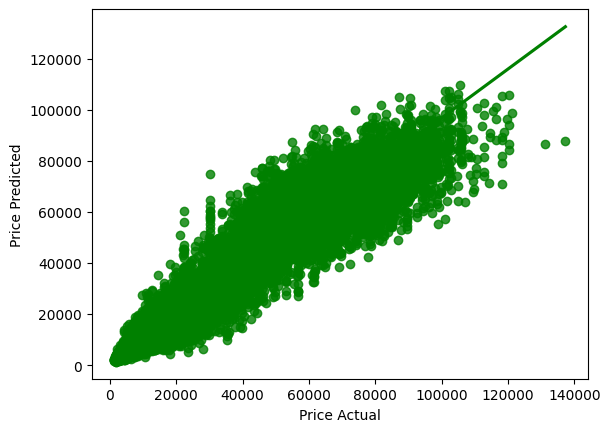

In [ ]:
sns.regplot(x='Price Actual',y='Price Predicted',data=pred_actu,color='green')
plt.show()

In [ ]:
new_df=pd.merge(dfa_val,pred_actu,left_index=True,right_index=True)

In [ ]:
new_df.columns=new_df.columns.str.lower().str.replace(" ",'_')

In [ ]:
actual_prices=new_df.groupby('duration_in_hours',as_index=False)['price_actual'].mean()

In [ ]:
predicted_prices=new_df.groupby('duration_in_hours',as_index=False)['price_predicted'].mean()

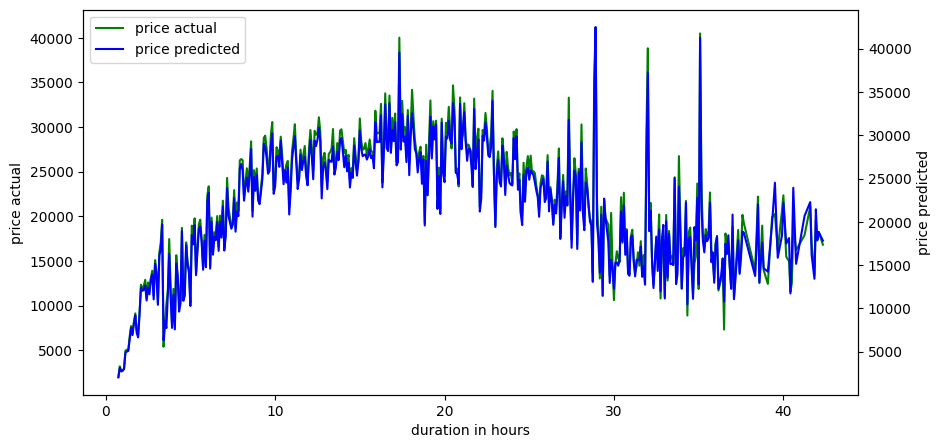

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax2=ax.twinx()
ax.plot(actual_prices.duration_in_hours,actual_prices['price_actual'],color='g')
ax2.plot(predicted_prices.duration_in_hours,predicted_prices['price_predicted'],color='b')
ax.set_xlabel('duration in hours')
ax.set_ylabel('price actual')
ax2.set_ylabel('price predicted')
ax.legend().set_visible(False)
ax2.legend([ax.get_lines()[0],ax2.get_lines()[0]],["price actual","price predicted"],loc="upper left")
plt.show()

In [ ]:
import pickle

In [ ]:
with open('dvf.bin','wb') as f_out1:
  pickle.dump(dv,f_out1)

In [ ]:
with open('modelf.sav','wb') as f_out3:
  pickle.dump(xgbmodel_hpt,f_out3)

In [ ]:
dfa_train

,date_of_journey,journey_day,airline,class,source,departure,total_stops,arrival,destination,duration_in_hours,days_left,day_of_month
0,2023-02-04,Saturday,Air India,Economy,Hyderabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,9.1667,20,4
1,2023-02-27,Monday,Vistara,Premium Economy,Bangalore,6 AM - 12 PM,1-stop,12 PM - 6 PM,Delhi,7.2500,43,27
2,2023-02-07,Tuesday,Air India,Economy,Ahmedabad,After 6 PM,1-stop,12 PM - 6 PM,Delhi,21.2500,23,7
3,2023-02-20,Monday,Vistara,Business,Mumbai,After 6 PM,1-stop,12 PM - 6 PM,Ahmedabad,18.0833,36,20
4,2023-02-10,Friday,GO FIRST,Economy,Delhi,After 6 PM,1-stop,6 AM - 12 PM,Kolkata,16.0000,26,10
...,...,...,...,...,...,...,...,...,...,...,...,...
271247,2023-02-12,Sunday,Air India,Business,Mumbai,6 AM - 12 PM,1-stop,After 6 PM,Bangalore,12.6667,28,12
271248,2023-02-16,Thursday,SpiceJet,Economy,Bangalore,After 6 PM,non-stop,After 6 PM,Kolkata,2.6667,32,16
271249,2023-02-17,Friday,Vistara,Economy,Hyderabad,12 PM - 6 PM,1-stop,Before 6 AM,Delhi,12.0833,33,17
271250,2023-02-18,Saturday,Indigo,Economy,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Bangalore,7.3333,34,18


In [ ]:
dfa_train.columns

Index(['date_of_journey', 'journey_day', 'airline', 'class', 'source',
       'departure', 'total_stops', 'arrival', 'destination',
       'duration_in_hours', 'days_left', 'day_of_month'],
      dtype='object')

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.2.2'

In [ ]:
xgbmodel_hpt.save_model("model.json")

In [ ]:
dfa_test

,date_of_journey,journey_day,airline,class,source,departure,total_stops,arrival,destination,duration_in_hours,days_left,day_of_month
0,2023-02-19,Sunday,Indigo,Economy,Bangalore,6 AM - 12 PM,1-stop,6 AM - 12 PM,Kolkata,5.6667,35,19
1,2023-01-18,Wednesday,Air India,Economy,Bangalore,After 6 PM,1-stop,12 PM - 6 PM,Hyderabad,15.0000,3,18
2,2023-02-19,Sunday,Vistara,Business,Delhi,12 PM - 6 PM,1-stop,6 AM - 12 PM,Hyderabad,17.4167,35,19
3,2023-01-27,Friday,Air India,Economy,Chennai,6 AM - 12 PM,1-stop,After 6 PM,Delhi,6.8333,12,27
4,2023-03-02,Thursday,Vistara,Premium Economy,Bangalore,6 AM - 12 PM,1-stop,12 PM - 6 PM,Hyderabad,7.2500,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...
90413,2023-03-02,Thursday,Vistara,Economy,Mumbai,12 PM - 6 PM,1-stop,After 6 PM,Bangalore,10.2500,46,2
90414,2023-01-18,Wednesday,Air India,Economy,Delhi,12 PM - 6 PM,1-stop,After 6 PM,Ahmedabad,26.0833,3,18
90415,2023-02-21,Tuesday,AkasaAir,Economy,Mumbai,12 PM - 6 PM,non-stop,12 PM - 6 PM,Bangalore,1.5000,37,21
90416,2023-01-18,Wednesday,Vistara,Business,Bangalore,6 AM - 12 PM,1-stop,12 PM - 6 PM,Kolkata,8.4167,3,18


In [ ]:
test_dict=dfa_test[category_new+numericc].to_dict(orient='records')


In [ ]:
test_dict[0]

{'journey_day': 'Sunday',
 'airline': 'Indigo',
 'class': 'Economy',
 'source': 'Bangalore',
 'departure': '6 AM - 12 PM',
 'total_stops': '1-stop',
 'arrival': '6 AM - 12 PM',
 'destination': 'Kolkata',
 'day_of_month': 19,
 'days_left': 35,
 'duration_in_hours': 5.6667}

In [ ]:
!python --version

Python 3.10.12
